# Analysis of VSV-G pseudotyped virus neutalization

### Set up Analysis

In [1]:
import itertools
import math
import os
import re
import warnings

from IPython.display import display, HTML

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import natsort

import numpy as np
import pandas as pd
from plotnine import *
import seaborn

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import yaml

In [2]:
warnings.simplefilter('ignore')

Read config file.

In [3]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

Set seaborn theme:

In [4]:
theme_set(theme_seaborn(style='white', context='talk', font_scale=1))
plt.style.use('seaborn-white')

In [5]:
resultsdir=config['resultsdir']
os.makedirs(resultsdir, exist_ok=True)

## Read in data

In [6]:
frac_infect = pd.read_csv(config['mAb_neuts_VSVG'], index_col=0)

## Fit Hill curve to data using [`neutcurve`](https://jbloomlab.github.io/neutcurve/)

In [7]:
fits = neutcurve.CurveFits(frac_infect, fixbottom=0, fixtop= True)

In [8]:
fitparams = (
        fits.fitParams()
        # get columns of interest
        [['serum', 'ic50', 'ic50_bound','virus']]
        .assign(NT50=lambda x: 1/x['ic50'])        
        )

In [9]:
fitparams['ic50_is_bound'] = fitparams['ic50_bound'].apply(lambda x: True if x!='interpolated' else False)

In [10]:
fitparams

,serum,ic50,ic50_bound,virus,NT50,ic50_is_bound
0,CC65.105,2.753327,interpolated,BA.1,0.363197,False
1,CC65.105,300.000000,lower,VSV-G,0.003333,True
2,NTD_5-7,0.427354,interpolated,BA.1,2.339978,False
3,NTD_5-7,96.000000,lower,VSV-G,0.010417,True
4,Ly-CoV1404,0.005371,interpolated,BA.1,186.188050,False
5,Ly-CoV1404,5.000000,lower,VSV-G,0.200000,True
6,CC9.104,2.335419,interpolated,BA.1,0.428189,False
7,CC9.104,300.000000,lower,VSV-G,0.003333,True


## Plot neut curves for mAbs

Saving to Ly-CoV1404_VSVG.pdf


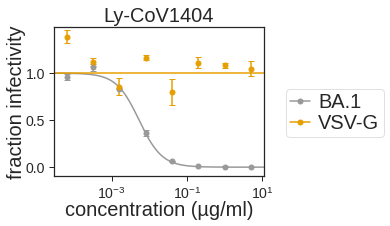

In [11]:
# neut with Ly-CoV1404
fig, axes = fits.plotSera(sera = ['Ly-CoV1404', ],
                          viruses=['BA.1','VSV-G'],
                          xlabel='concentration (µg/ml)',
                          ncol=1,
                          widthscale=1,
                          heightscale=1,
                          titlesize=20, labelsize=20, ticksize=14,
                          legendfontsize=20, yticklocs=[0,0.5,1],
                          markersize=5, linewidth=1.5,
                          max_viruses_per_subplot = 8,
                          markers=['o','o']
                         )
plotfile = 'Ly-CoV1404_VSVG.pdf'
print(f"Saving to {plotfile}")
fig.savefig(f'{resultsdir}/{plotfile}', bbox_inches='tight')

Saving to NTS_S2_mAbs_VSVG.pdf


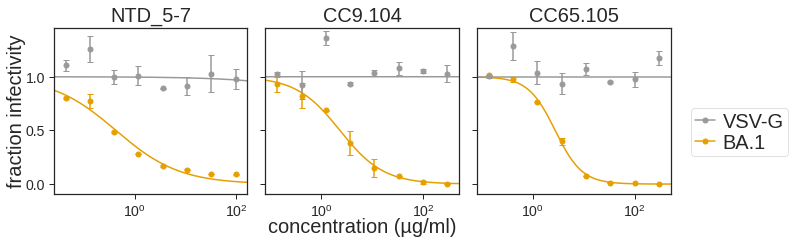

In [12]:
# neuts with NTD_5-7, CC9.104, and CC65.105
fig, axes = fits.plotSera(sera = ['NTD_5-7','CC9.104', 'CC65.105'],
                          viruses=['VSV-G', 'BA.1'],
                          xlabel='concentration (µg/ml)',
                          ncol=3,
                          sharex=False,
                          widthscale=1,
                          heightscale=1.2,
                          titlesize=20, labelsize=20, ticksize=14,
                          legendfontsize=20, yticklocs=[0,0.5,1],
                          markersize=5, linewidth=1.5,
                          max_viruses_per_subplot = 8,
                          markers=['o','o']
                         )
plotfile = 'NTS_S2_mAbs_VSVG.pdf'
print(f"Saving to {plotfile}")
fig.savefig(f'{resultsdir}/{plotfile}', bbox_inches='tight')